In [1]:
# Set up environment and import packages
import numpy as np
import math
import struct

## MA934

## Floating point arithmetic

### How computers approximate arithmetic

### Representation of unsigned integers

Binary representation of (3 bit) integers:
$$ b_2b_1b_0 = b_2\,2^2 + b_1\,2^1 + b_0\,2^0 $$

Finite maximum and minimum integers.
Modern computers use 64 bits but smaller (and larger) integer types can often be accommodated for depending on the programming language of choice.

Here are the unsigned integer types:



|Type |Bits |Minimum |Maximum |
|:- |--- | --- |---|
|UInt8 | 8 |0 | $2^8 - 1$|
|UInt16 | 16 |0 | $2^{16} - 1$|
|UInt32 | 32 |0 | $2^{32} - 1$|
|UInt64 | 64 |0 | $2^{64} - 1$|

### Representation of signed integers : two's complement
The negative of $x>0$ is encoded using *two's complement*,

> $\overline{x}$ = flip all bits of $x$ and add 1.

Example:  
6 = 00000110,  
$\overline{6}$ = 11111001 + 1 = 11111010 

Signed integer types in Python:

|Type |Bits |Minimum |Maximum |
|:- |--- | --- |---|
|int8 | 8 |$-2^7$ | $2^7 - 1$|
|int16 | 16 |$-2^{15}$ | $2^{15} - 1$|
|int32 | 32 |$-2^{31}$ | $2^{31} - 1$|
|int64 | 64 |$-2^{63}$ | $2^{63} - 1$|

You should (in time) become comfortable with checking documentation and pages such as the [docs.python.org](https://docs.python.org/3/library/stdtypes.html) pages and [other resources](https://data-apis.org/array-api/latest/API_specification/data_types.html).

### Advantages of two's complement 

Why not just use a "sign" bit?
* Avoids two representations of zero.
* Subtraction can be performed using the same hardware as addition:
> Subtraction of y from x : add  two's complement of y to x and drop leading ("overflow") bit.

* Example: $7 - 6 = 7 + \overline{6}$ =  (check) 

### Representation of real numbers

Use a binary version of *normalised* scientific notation:
$ x = -1^S \times  (1.0+0.M) \times 2^E $

e.g. IEEE 754 32-bit (Float32): 

|Field |Size|Bits |
| :-- | :-: | :-: |
| Sign (S) | 1 | 31 |
| Exponent (E + 127) | 8 | 23 - 30 |
| Mantissa (M) | 23 | 0 - 22 |

"Bias": if exponent is $E$, we store E+127 (for Float32).  This makes comparisons easier..

![Float32](files/images/590px-Float_example.png)


In [2]:
x1 = 2
print(type(x1))

x2 = 20.1
print(type(x2))

# Hint: have a look at Python datatypes and in particular at the 'float32' 'and float64' datatypes

# We can also see our data as binary strings, either in compact form ...
x3 = 100
binary3 = "{0:b}".format(x3)
print(binary3)

# or with a pre-specified precision
binary4 = '{0:016b}'.format(x3)
print(binary4)

<class 'int'>
<class 'float'>
1100100
0000000001100100


### Round-off error

* Finite mantissae introduce errors when truncating real numbers whose binary expansion is longer than 23 (Float32) or 52 (Float64).
* Round-off error is a feature of the hardware and cannot be avoided.

In [3]:
a = np.float64(0.1);
b = np.float64(0.2);
c = np.float64(0.3);

print('a = %.16e' % a, 'b = %.16e' % b, 'c = %.16e' % c)

a = 1.0000000000000001e-01 b = 2.0000000000000001e-01 c = 2.9999999999999999e-01


This can lead to counter-intuitive behaviour:

In [4]:
a + b == c

False

### Floating point arithmetic

Rules for adding two floating point numbers:

1. Rewrite the smaller number so its exponent matches that of the larger number.
2. Add the mantissae.
3. Normalise the sum.
4. Round the sum.



### Machine precision  

In [5]:
a = np.float32(1.0); 
b = np.float32(pow(10.0,-10));

print(a == 0)
print(b == 0)
print((a+b) == a)

b*pow(10.0, 32)

False
False
True


1.000000013351432e+22

The *machine precision* (or *machine epsilon*) is the smallest floating point number which when added to 1 gives an answer larger than one.

### Machine precision

In Python ``.eps`` gives the machine precision:

In [6]:
print(np.finfo(np.float32).eps)
print(np.finfo(np.float64).eps)

1.1920929e-07
2.220446049250313e-16


These values are $2.0^{-23}$ and $2.0^{-52}$, respectively.

### Loss of significance
Subtraction of "nearby" numbers leads to loss of precision.

Calculate sum and difference of 2 nearby numbers in 32-bit precision:

In [7]:
# Interestingly - single precision is not actually supported in Python in earnest, see:
# https://python-reference.readthedocs.io/en/latest/docs/float/

a32o = np.float32(2.0) + pow(np.float32(3.0),-12.0); 
b32o = np.float32(2.0);

a32 = struct.unpack('f', struct.pack('f', a32o))[0];
b32 = struct.unpack('f', struct.pack('f', b32o))[0];

sum32 = a32 + b32;
diff32 = a32 - b32;

print('32 bit: a = ', a32, 'b = ', b32)
print('32 bit: sum = ', sum32, 'diff = ', diff32)

32 bit: a =  2.000001907348633 b =  2.0
32 bit: sum =  4.000001907348633 diff =  1.9073486328125e-06


### Loss of significance

Now calculate the same sum and difference in 64 bit precision:

In [8]:
a64 = np.float64(2.0) + pow(np.float64(3.0),-12.0); 
b64 = np.float64(2.0);

sum64 = a64 + b64;
diff64 = a64 - b64;

print('64 bit: a = ', a64, 'b = ', b64)
print('64 bit: sum = ', sum64, 'diff = ', diff64)

64 bit: a =  2.000001881676423 b =  2.0
64 bit: sum =  4.000001881676424 diff =  1.8816764231210925e-06


### Loss of significance

We can treat the 64 bit answer as "exact" compared to the 32 bit answer and calculate the relative error in the 32 bit result:

In [9]:
relErrSum = abs(sum64 - sum32)/sum64;
relErrDiff = abs(diff64 - diff32)/diff64;
print('Sum relative error = ', relErrSum)
print('Difference relative error = ', relErrDiff)

Sum relative error =  6.41804929265656e-09
Difference relative error =  0.013643264790885564


### Numerical instability

Iterative calculations can lose precision by accumulation of round-off error:

* Assuming inputs $\sim 1$, each FP addition introduces an error of $\sim \epsilon_m$.
* Might expect, after $n$ iterative steps, total error $\sim \sqrt{n}\, \epsilon_m$?

However, some iterations can produce total error $\sim e^n$ due to *instability*.

### Numerical instability: simple example

Consider the following iterative procedures:

P1 : $a_{n+1} = \phi\,a_n$ with $a_0 = 1$,  

P2 : $a_{n+1} = a_{n-1} - a_{n}$ with $a_0 = 1$ and $a_1 = \phi$,

where $\phi = (\sqrt{5}-1)/2$.

Both have the exact solution (check): 
$$a_n = \phi^n.$$

### Numerical instability: simple example

However their numerical behaviour is very different for large $n$:

In [10]:
phi = np.float64(0.5*(math.sqrt(5.)-1.)); 
n = 70;

# Allocate some arrays
P1 = [np.float64(0.0)] * n;
P2 = [np.float64(0.0)] * n;

# Set initial conditions
P1[0] = P2[0] = np.float64(1.); 
P2[1] = phi;

# Note that indexing for lists start from 0 in Python!

In [11]:
for i in range(1, n):
    P1[i] = phi*P1[i-1]

In [12]:
for i in range(2, n):
    P2[i] = P2[i-2] - P2[i-1]

### Numerical instability: simple example

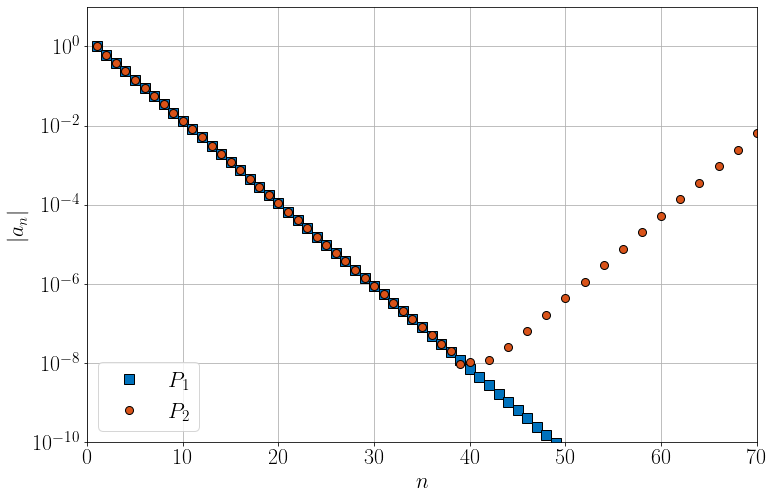

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))

l1 = plt.semilogy(list(range(1,n+1)), P1, "ks", label=r"$P_1$", markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
l2 = plt.semilogy(list(range(1,n+1)), P2, "ko", label=r"$P_2$", markersize=8, markerfacecolor=(0.85, 0.325, 0.098, 1))

plt.legend(loc="lower left")

plt.xlabel(r"$n$")
plt.ylabel(r"$\left| a_n \right|$")
plt.xlim([0, 70])
plt.ylim([1e-10, 1e1])
plt.grid()
plt.show()

### Numerical instability: simple example

What's going on? Due to round-off we have solved a different problem:

P2 : $a_{n+1} = a_{n-1} - a_{n}$ with $a_0 = 1$ and $a_1 = \phi + \varepsilon$.

The solution is
$$ a_n = \left(1 + \frac{\varepsilon}{\sqrt{5}}\right)\,\phi^n  - \frac{\varepsilon}{\sqrt{5}}\, \tilde{\phi}^n,$$
where $\tilde{\phi} = (-\sqrt{5}-1)/2$.  
Notice that $\left|\tilde{\phi}\right| > 1$. This is an unstable iteration.